In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
#from utils_imgprocessing import *

directory_work = "/content/drive/My Drive/Work/01_ProyectoARIA" #ScrappingWeb.ipynb
os.chdir(directory_work)

def load_code_from_url(url_path):
  code_str = urlopen(url_path).read()
  code_str = code_str.decode('utf-8')
  exec(code_str)
  return code_str

Mounted at /content/drive/


In [ ]:
code_str = load_code_from_url("https://raw.githubusercontent.com/hoat23/VisionArtificialAndImageProcessing/master/bin/utils_imgprocessing.py")
exec(code_str)

In [ ]:
#https://dlegorreta.wordpress.com/2015/05/24/encontrando-grupos-o-analisis-de-cluster/
#!cd /content/drive/My\ Drive/Work/01_ProyectoARIA
!pwd
#!ls -la
#!nvidia-smi

/content/drive/My Drive/Work/01_ProyectoARIA


In [ ]:
directory_work = "/content/drive/My Drive/Work/01_ProyectoARIA"
set_directory_work(directory_work)

set_directory_work | [/content/drive/My Drive/Work/01_ProyectoARIA]


In [ ]:
def load_image(name_image, directory='/images'):
  print("*************{}*****************".format(name_image))
  img_json = read_image(name_image,directory=directory)
  if not img_json['error']:
    return img_json['img']

def load_list_images(list_names_images, directory='/images'):
  list_img = []
  for name_image in list_names_images:
    list_img.append( load_image(name_image, directory=directory) )
  return list_img

In [ ]:
n_start = 0
n_end = 1

# TESTING CUOX  CUOX_SEG

partial_name = "CUOX_SEG" # "CUOX"

if partial_name == "CUOX_SEG":
  num_images = 2
  directory='/images/{0}'.format(partial_name)
  print("Images from {0}".format(partial_name))
  list_names_images_seg = get_list_img(directory, filter="*_SEG.*")
  print(" labeled images: {0}".format(len(list_names_images)))
  print(" total images  : {0}".format(len(get_list_img(directory, filter="*"))))
  list_names_images_seg = list_names_images_seg[0:2]
  list_test_img_01 = [x.replace("_SEG","") for x in list_names_images_seg]
  list_test_img_02 = list_names_images_seg
  # loading images 
  list_test_img_01 = load_list_images(list_test_img_01[0:num_images], directory=directory)
  list_test_img_02 = load_list_images(list_test_img_02[0:num_images], directory=directory)

elif partial_name == "TESTING":
  directory='/images/{0}'.format(partial_name)
  print("Images from {0}".format(partial_name))
  list_names_images = get_list_img(directory)
  list_test_img_01 = load_list_images([list_names_images[1]], directory=directory)
  list_test_img_02 = load_list_images([list_names_images[0]], directory=directory)
else:
  directory='/images/{0}_XML'.format(partial_name)
  print("Images from {0}".format(directory))
  list_names_images_01 = get_list_img(directory)
  list_test_names_images_01 = list_names_images_01[n_start:n_end]
  list_test_img_01 = load_list_images(list_test_names_images_01)
  #list_img = load_list_images(list_names_images)

  directory='/images/{0}_SEG'.format(partial_name)
  print("Images from {0}".format(directory))
  list_names_images_02 = get_list_img(directory)
  list_test_names_images_02 = list_names_images_02[n_start:n_end]
  list_test_img_02 = load_list_images(list_test_names_images_02)


Images from CUOX_SEG
 labeled images: 361
 total images  : 722
*************01092020_1.JPG*****************
*************27082020_1.JPG*****************
*************01092020_1_SEG.JPG*****************
*************27082020_1_SEG.JPG*****************


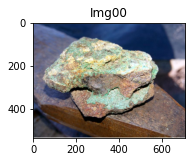

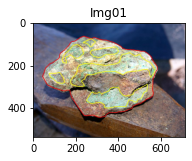

In [ ]:
import time
#%matplotlib inline
idx = 0
plot_list_img([list_test_img_01[idx] ,
              list_test_img_02[idx]] ,
              rows=1, cols=2, axis='on')

img01 : (537, 711, 3)
img02 : (534, 715, 3)


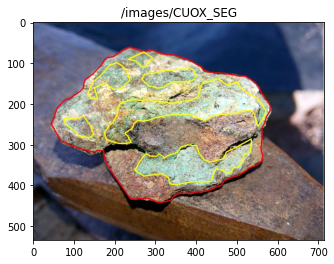

In [ ]:
img02 = list_test_img_02[idx]
img01 = list_test_img_01[idx]
print("img01 :", img01.shape)
print("img02 :", img02.shape)
plot_img(list_test_img_02[idx],title=directory)

Loading {0} /images/CUOX_SEG
*************01092020_1_SEG.JPG*****************


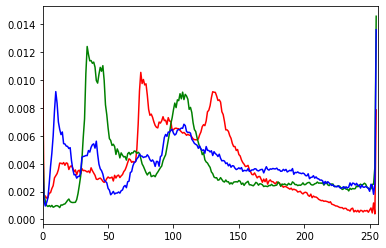

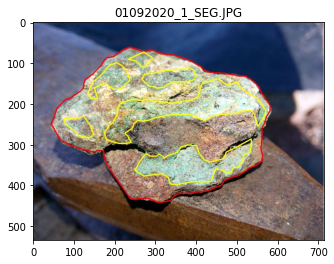

In [ ]:
#'/images/CUOX_XML'
#'/image s/CUOX_SEG'

if directory == None:
  directory='/images/CUOX_XML'

print("Loading {0}",format(directory))
list_img = get_list_img(directory)
for name_image in list_img:
  print("*************{}*****************".format(name_image))
  img_json = read_image(name_image,directory=directory)
  if not img_json['error']:
    scale = img_json['size']
    hst = histogram(img_json['img'],scale=scale)
    plot_histogram(hst)
    plot_img (img_json['img'], title=img_json['name'])
  break# Solo una imagen
#test_multigamma_value(img_json['img'])

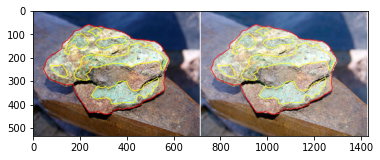

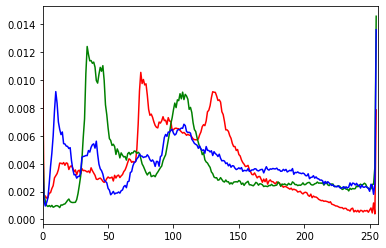

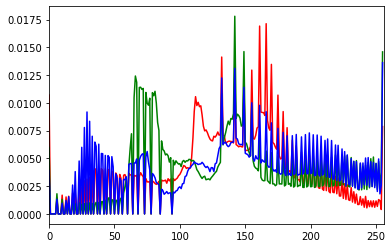

In [ ]:
# Adjust Gamma
gamma = 1.5
img_original = img02
adjusted = adjust_gamma(img_original, gamma=gamma)
#cv2.putText(adjusted, "g={}".format(gamma), (10, 30),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 6)
#cv2_imshow(np.hstack([img_original, adjusted]))
plot_img(np.hstack([img_original, adjusted]))
img_json['size']
hst_before = histogram(img_original,scale=scale)
hst_after = histogram(adjusted,scale=scale)
plot_histogram(hst_before)
plot_histogram(hst_after)

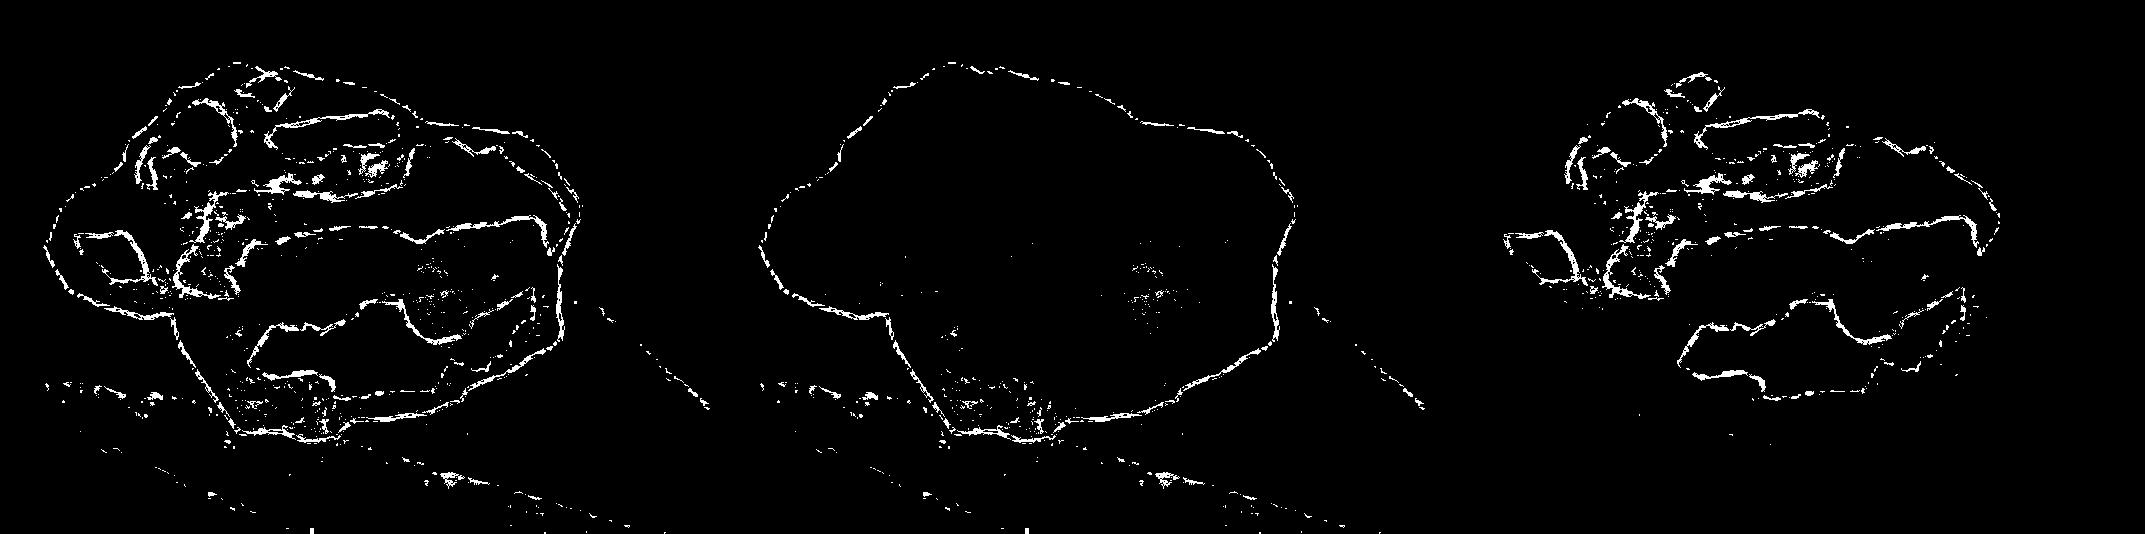

In [ ]:
# Getting mask red and yellow
mask_red = get_mask_by_color(img_original,'red')
mask_yellow = get_mask_by_color(img_original,'yellow')
cv2_imshow(np.hstack([mask_red+mask_yellow, mask_red, mask_yellow]))

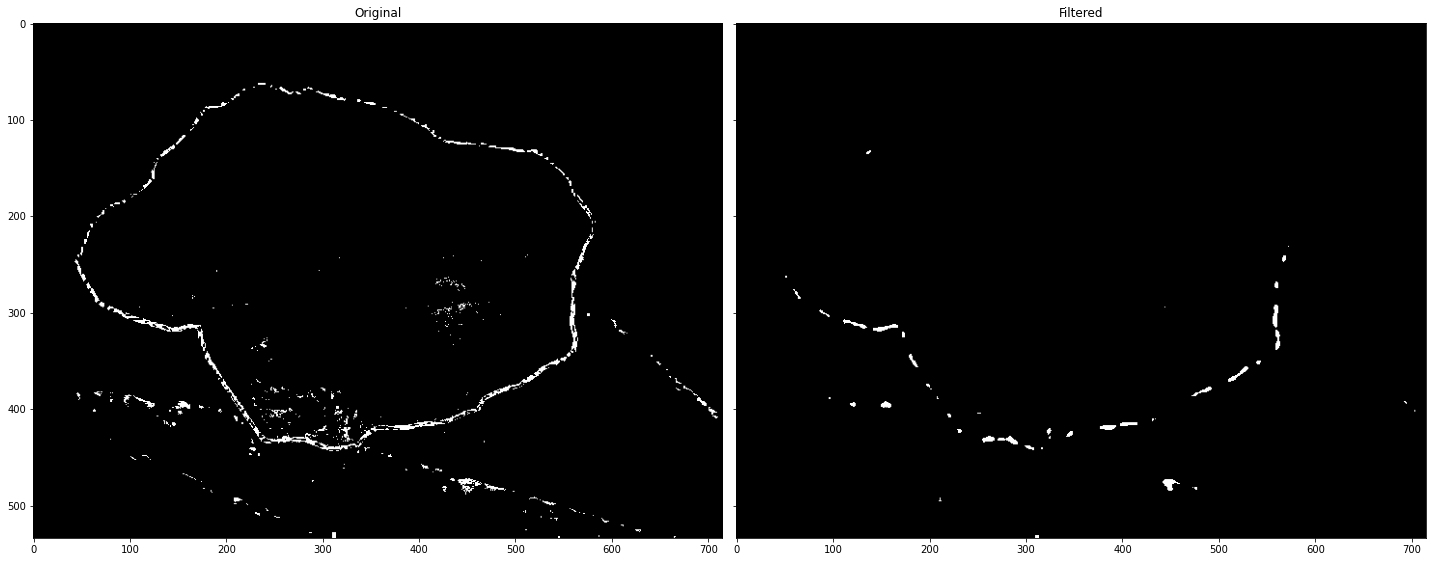

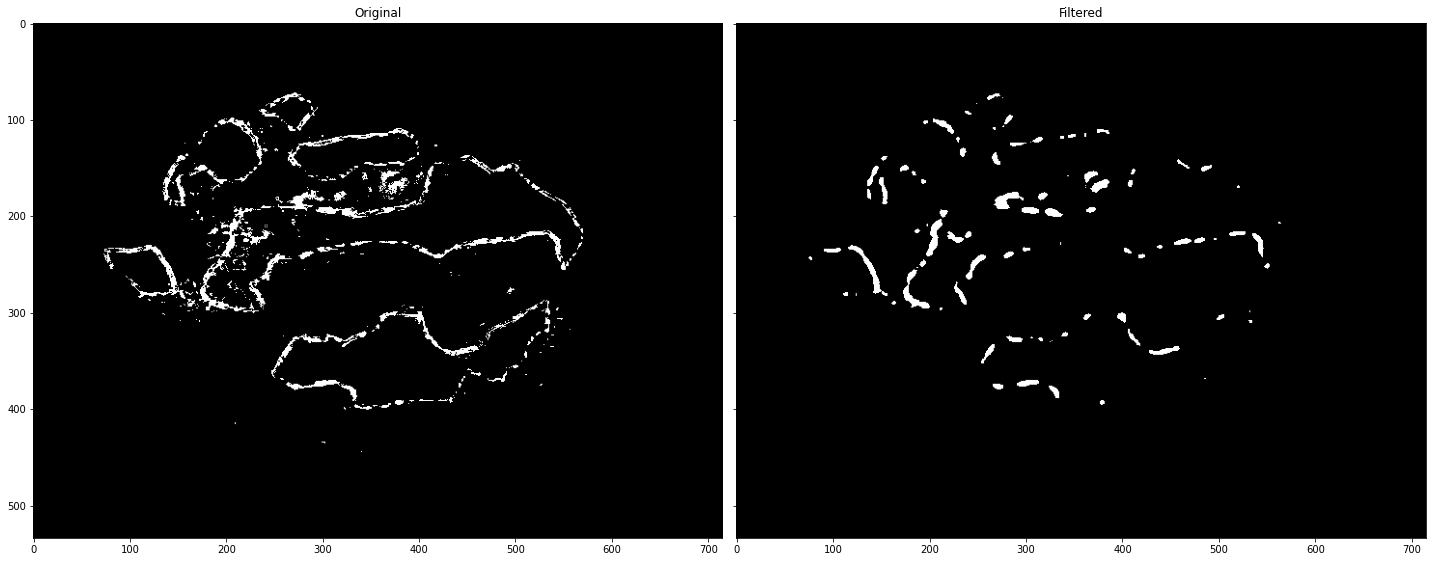

In [ ]:
mask_filtered_red = median_filtered(mask_red, plot=True)
mask_filtered_yellow = median_filtered(mask_yellow, plot=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Viewer requires Qt
  


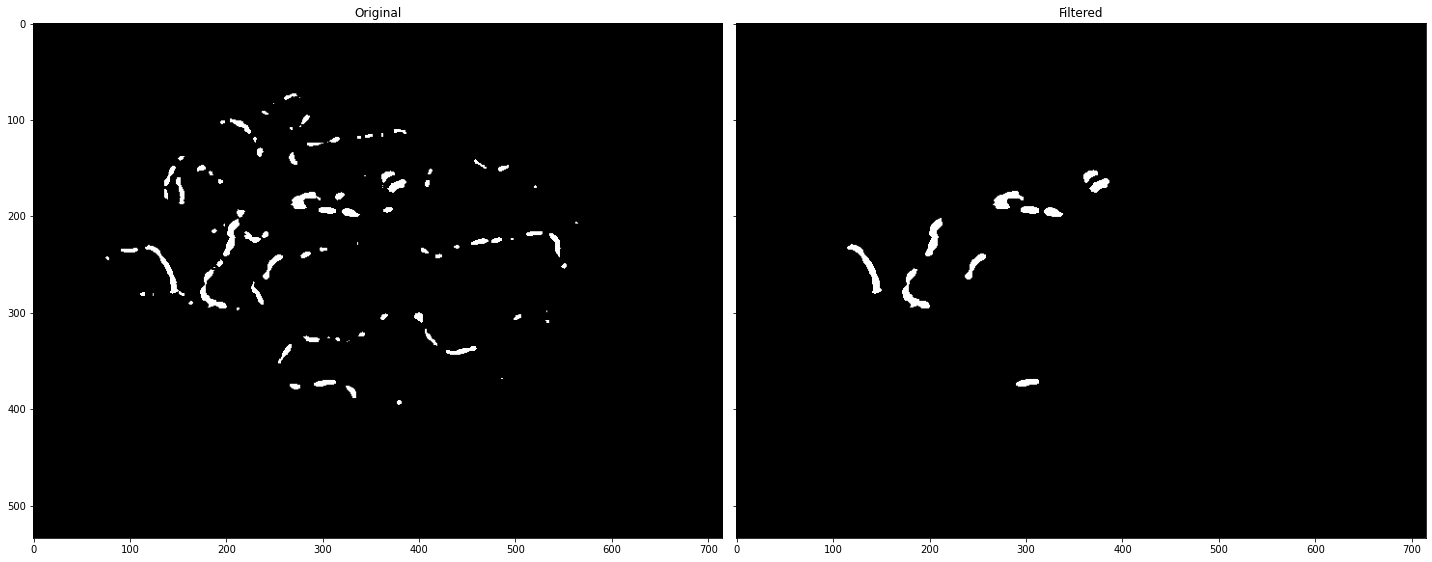

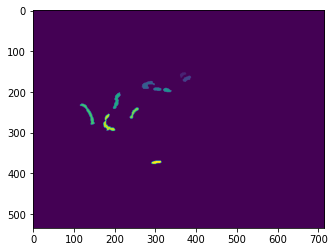

num of contours              : 92
percentil value filter       : 90
unique values <mask_work>    : [  0 255]
unique values <mask_filtered>: [  0 127]
unique labels <mask_lavbel>: [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
from skimage.measure import find_contours
from skimage import draw
from scipy import ndimage as ndi
from skimage.measure import label
from skimage.measure import regionprops
from skimage.viewer import ImageViewer

mask_work = mask_filtered_yellow.copy()
th = 100
percentil_upper = 90

#mask_binarized = (mask_work > th) * 255
contours = find_contours(
              mask_work, 
              150, 
              fully_connected='low', 
              positive_orientation='low'
            )

list_kpi = []
for n, contour in enumerate(contours):
    #ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    c = np.expand_dims(contour.astype(np.float32), 1)
    c = cv2.UMat(c)
    area = cv2.contourArea(c)*1.0
    perimeter = cv2.arcLength(c,True)
    list_kpi.append( area*1.0/perimeter)

percentil = np.percentile(list_kpi, percentil_upper)
list_kpi = np.array(list_kpi)
filter = list_kpi>percentil

# Display the image and plot all contours found
mask_filtered = np.zeros(
              shape=mask_work.shape,
              dtype="int8") #"int32") #"uint8")

for n, contour in enumerate(contours):
    if filter[n]:
      pts = np.array([contour[:,1], contour[:,0]], np.int32)
      pts = np.transpose(pts)
      pts = pts.reshape(-1,1,2)
      #cv2.polylines(mask_filtered, np.int32([pts]), 1, (255,0,0), 1, cv2.LINE_AA)
      cv2.fillPoly(mask_filtered, [pts], (255), cv2.LINE_AA)
#ax.axis('image') #ax.set_xticks([]) #ax.set_yticks([]) #plt.show()

plot_compare(mask_work, mask_filtered)
mask_label = label(mask_filtered, connectivity=mask_filtered.ndim )
plot_img(mask_label)

print("num of contours              :", len(contours))
print("percentil value filter       :", percentil_upper)
print("unique values <mask_work>    :", np.unique(mask_work))
print("unique values <mask_filtered>:", np.unique(mask_filtered))
print("unique labels <mask_lavbel>:", np.unique(mask_label))

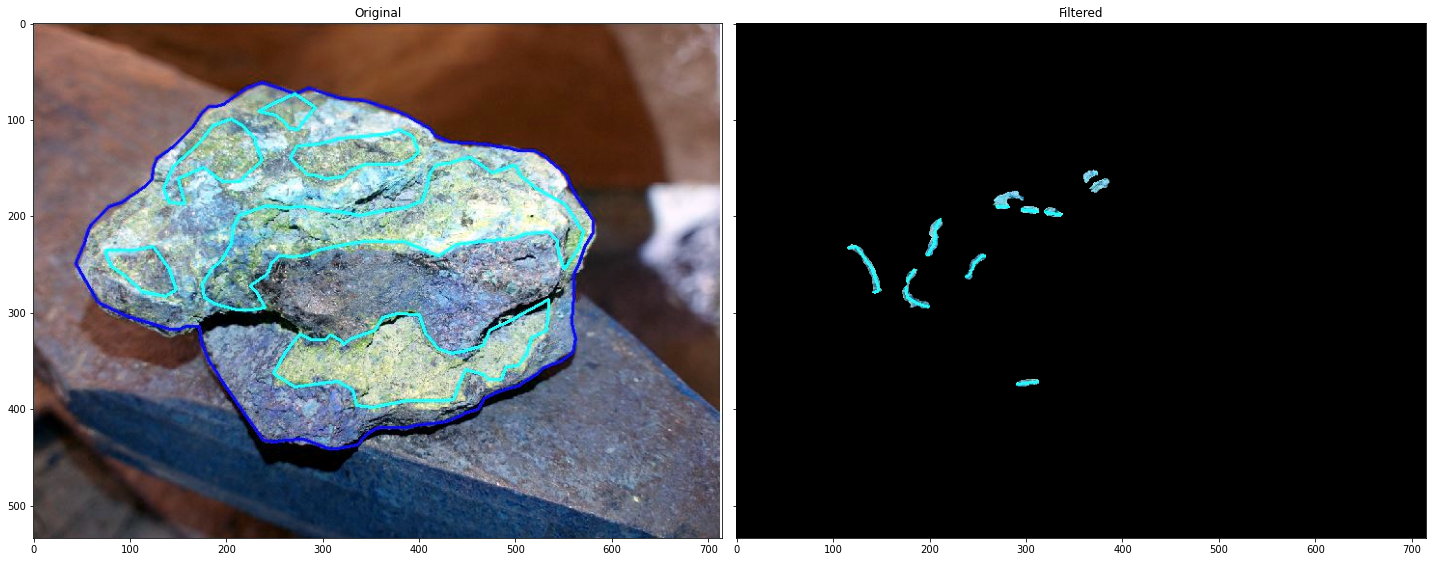

In [ ]:
img_work = img_original.copy()
mask = mask_filtered #np.uint8(mask_filtered)
img_filtered = filter_image_by_mask(img_work, mask, render=True)

In [ ]:
from skimage.data import astronaut
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

img_work = img_filtered.copy()
numSegments = 250
segments1 = slic(img_work, n_segments=numSegments, compactness=10)
segments2 = slic(img_work, n_segments=numSegments, sigma=5)
segments3 = felzenszwalb(img_work, scale=200, sigma=0.5, min_size=100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


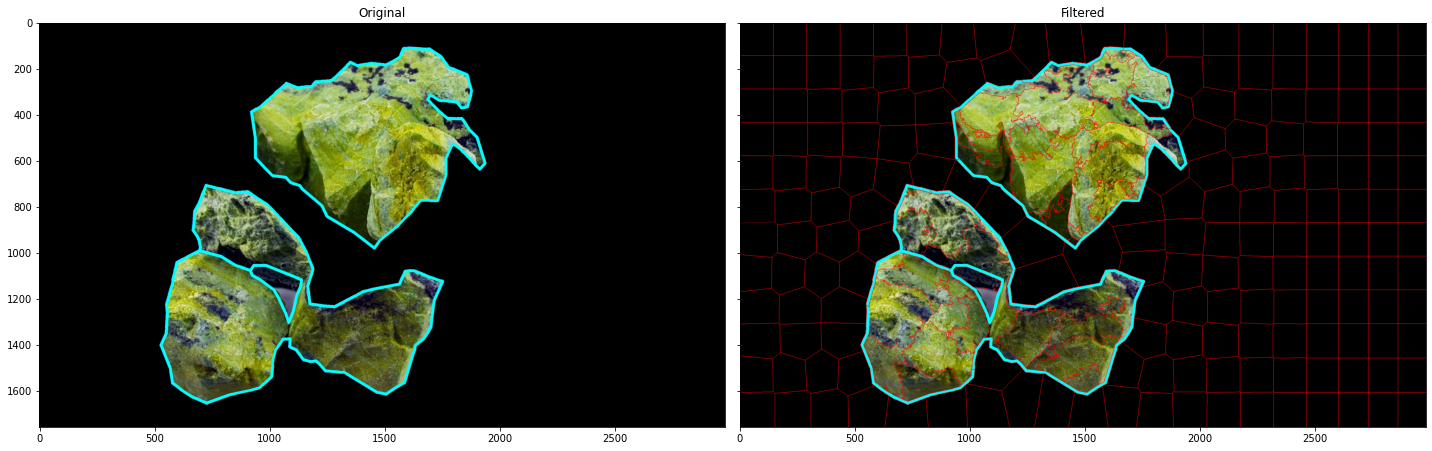

In [ ]:
#show_image(mark_boundaries(img_work, segments2,color=(255,0,0),background_label=3))
img_tmp = mark_boundaries(img_work, segments1, color=(255,0,0),background_label=100)
plot_compare(img_work, img_tmp)
#mask = np.zeros(thresh.shape, dtype="uint8")
#cv2.drawContours(mask, [c], -1, 255, -1)

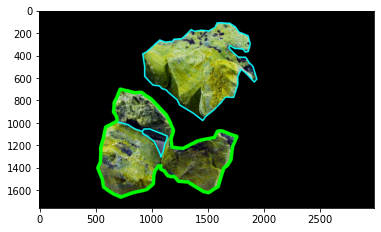

         Po    : ( 523 , 106 )
         Width : 1422
         Higth : 1554


In [ ]:
img_copy = img_filtered.copy()#img_original.copy()
labels = mask_label.copy()
# Countours Detection
filter_value = 2; threshold_level = 0; mode = cv2.RETR_CCOMP # _LIST _EXTERNAL _CCOMP _TREE

mask_8bit = np.uint8( np.where(labels == filter_value, 1 , 0) )
_, binarized = cv2.threshold(mask_8bit, threshold_level, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(binarized, mode, cv2.CHAIN_APPROX_SIMPLE)

# Drawing contours
countourIdx=255; color = (0,255,0); thickness = 30
img_show = cv2.drawContours(img_copy, contours, -1, color, thickness)
plt.imshow(img_show)
plt.show()

mask_work =  np.uint8(labels) #"int32") #"uint8")
#area = cv2.contourArea(mask_work)
x,y,w,h = cv2.boundingRect(mask_work)
#print("         Area  :", area)
print("         Po    : (", x,",",y,")")
print("         Width :", w)
print("         Higth :", h)


         Area       : 656096.5
         Matter area: 55.31992303567273
         Po         : ( 523 , 702 )
         Width      : 1238
         Higth      : 958


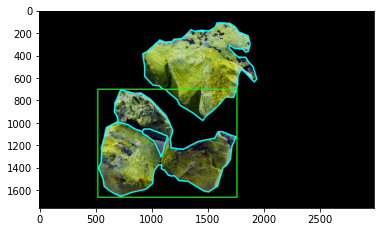

In [ ]:
cnt = contours[0] #After filtered contour just have 1 object matter
area = cv2.contourArea(cnt)
x,y,w,h = cv2.boundingRect(cnt)
print("         Area       :", area)
print("         Matter area:", area*100/(h*w))
print("         Po         : (", x,",",y,")")
print("         Width      :", w)
print("         Higth      :", h)


thickness = 10
img_copy = img_filtered.copy()
img_rectangle_contour = cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),thickness)
plt.imshow(img_rectangle_contour)
plt.show()

In [ ]:
# Cutting a image
img_cut = img_copy[ y : y+h , x : x+w ]
plt.imshow(img_cut)
plt.show()

NameError: ignored

In [ ]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 4.5MB/s 


In [ ]:
import mahotas
from sklearn.svm import LinearSVC
import glob 
import cv2
from matplotlib import pyplot as plt

In [ ]:
#load and convert image to gray, then extract texture label
img_work = img_cut.copy()
img_gray = cv2.cvtColor(img_work,cv2.COLOR_BGR2GRAY)

#extract texture features in 4 directions and take mean
features = mahotas.features.haralick(img_gray).mean(axis=0)

#update data and labels
print(features)

[ 1.17597614e-01  3.40005813e+02  9.69975925e-01  5.66205795e+03
  6.47861661e-01  1.68984567e+02  2.23082260e+04  6.31945746e+00
  8.51191205e+00  1.54011031e-03  2.89887291e+00 -5.11764036e-01
  9.98193133e-01]


In [ ]:
#load and convert image to gray, then extract texture label
img_work = img_cut.copy()
img_gray = cv2.cvtColor(img_work,cv2.COLOR_BGR2GRAY)

#extract texture features in 4 directions and take mean
features = mahotas.features.haralick(img_gray).mean(axis=0)

#update data and labels
print(features)

[ 1.21342401e-01  3.76013691e+02  9.59919070e-01  4.69088756e+03
  6.49490756e-01  1.37206959e+02  1.83875365e+04  6.23935895e+00
  8.43741980e+00  1.56756498e-03  2.91349245e+00 -5.05308179e-01
  9.97902158e-01]
